In [9]:
import pandas as pd
import numpy as np
from os import listdir
import os
from matplotlib import pyplot as plt
from matplotlib.pylab import imread
plt.rcParams["figure.figsize"] = [16,9]
from tqdm import tqdm
import cv2
import torch

In [2]:
train_labels = pd.read_csv("data/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [3]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

def load_image(basepath, image_id):
    images = np.empty(shape=(4,512,512))
    images[0,:,:] = imread(os.path.join(basepath, image_id + "_green" + ".png"))
    images[1,:,:] = imread(os.path.join(basepath, image_id + "_red" + ".png"))
    images[2,:,:] = imread(os.path.join(basepath, image_id + "_blue" + ".png"))
    images[3,:,:] = imread(os.path.join(basepath, image_id + "_yellow" + ".png"))
    return images

In [4]:
# for key in label_names.keys():
#     train_labels[label_names[key]] = 0

# train_labels = train_labels.apply(fill_targets, axis=1)
# train_labels.head()

In [5]:
files = listdir("data/train")
for n in range(10):
    print(files[n])

d2d650a6-bbb4-11e8-b2ba-ac1f6b6435d0_blue.png
d94c942c-bbbe-11e8-b2ba-ac1f6b6435d0_blue.png
0852388e-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png
7f51bc18-bbaa-11e8-b2ba-ac1f6b6435d0_blue.png
07dd9eea-bbbe-11e8-b2ba-ac1f6b6435d0_blue.png
7c5ca976-bbac-11e8-b2ba-ac1f6b6435d0_yellow.png
c525b2d8-bbc0-11e8-b2bb-ac1f6b6435d0_red.png
580586ea-bba9-11e8-b2ba-ac1f6b6435d0_yellow.png
b0c0ca4c-bba9-11e8-b2ba-ac1f6b6435d0_yellow.png
76bf7cc8-bbbb-11e8-b2ba-ac1f6b6435d0_green.png


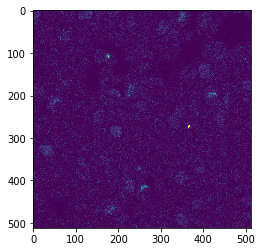

In [6]:
im = load_image('data/train', train_labels.Id[0])
plt.imshow(im[0])

In [7]:
data_size = len(train_labels)
ds_path = 'data/train'
images = np.empty((data_size, 4, 512, 512))
for i, im_id in enumerate(tqdm(train_labels.Id)):
    if i > 500:
        break
    images[i,0,:,:] = cv2.imread(os.path.join(ds_path, im_id + "_green" + ".png"), 0)
    images[i,1,:,:] = cv2.imread(os.path.join(ds_path, im_id + "_red" + ".png"), 0)
    images[i,2,:,:] = cv2.imread(os.path.join(ds_path, im_id + "_blue" + ".png"), 0)
    images[i,3,:,:] = cv2.imread(os.path.join(ds_path, im_id + "_yellow" + ".png"), 0)

  2%|▏         | 500/31072 [00:05<06:02, 84.41it/s]


In [45]:
ids = train_labels.Id

In [56]:
def target2onehot(target):
    y = np.zeros(len(label_names))
    t = [int(t) for t in target.split(' ')]
    y[t] = 1
    return y

onehot = [target2onehot(t) for t in train_labels.Target]
lables = dict(zip(ids, np.array(onehot)))